In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [2]:
iris_data = pd.read_csv('./iris-data.csv')

In [21]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [6]:
iris_data.loc[:,['petal_width_cm']]

,petal_width_cm
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2
...,...
145,2.3
146,2.3
147,2.0
148,2.3


In [7]:
nan_indices = iris_data[pd.isna(iris_data['petal_width_cm'])].index
print(f'NaN indices: {nan_indices}')

NaN indices: Index([7, 8, 9, 10, 11], dtype='int64')


In [8]:
iris_data.loc[[6,7, 8, 9, 10, 11,12],:]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [9]:
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df.reset_index(drop=True)

In [10]:
missing_percentage(iris_data)

,column_name,percent_missing
0,sepal_length_cm,0.000000
1,sepal_width_cm,0.000000
2,petal_length_cm,0.000000
3,petal_width_cm,3.333333
4,class,0.000000


In [11]:
#imputation

iris_input = copy.deepcopy(iris_data)
iris_input

iris_imputer= copy.deepcopy(iris_data)
iris_imputer

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
#imputation using pandas

iris_input['petal_width_cm'] = iris_input['petal_width_cm'].fillna(iris_input['petal_width_cm'].mean())

missing_percentage(iris_input)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


In [20]:
#imputter

imputer = SimpleImputer(strategy='mean', missing_values= np.nan)
imputer= imputer.fit(iris_imputer[['petal_width_cm']])
imputer.get_params(deep=True)
missing_percentage(iris_imputer)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


In [14]:
iris_imputer['petal_width_cm'] = imputer.transform(iris_imputer[['petal_width_cm']])

missing_percentage(iris_imputer)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


In [16]:
iris_imputer.loc[:,['class']]

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [17]:
#Replace bad written values

iris_imputer.replace(to_replace={'class':'Iris-setossa'}, value='Iris-setosa', inplace=True)

iris_imputer.loc[18,['class']]

class    Iris-setosa
Name: 18, dtype: object

In [18]:
#Encoding cat with one line hot encoding

cat_cols= ['class']

iris_onehot = pd.get_dummies(iris_imputer[cat_cols],
                             columns=['class'],
                             )
#iris_onehot.pop('class_versicolor')
iris_onehot

,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica,class_versicolor
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
145,False,False,True,False
146,False,False,True,False
147,False,False,True,False
148,False,False,True,False


In [27]:
print(iris_imputer['sepal_length_cm'].corr(iris_imputer['sepal_width_cm'], method='pearson'))
print(iris_imputer['petal_length_cm'].corr(iris_imputer['petal_width_cm'], method='pearson'))

0.06609077053789962
0.9312382130491329


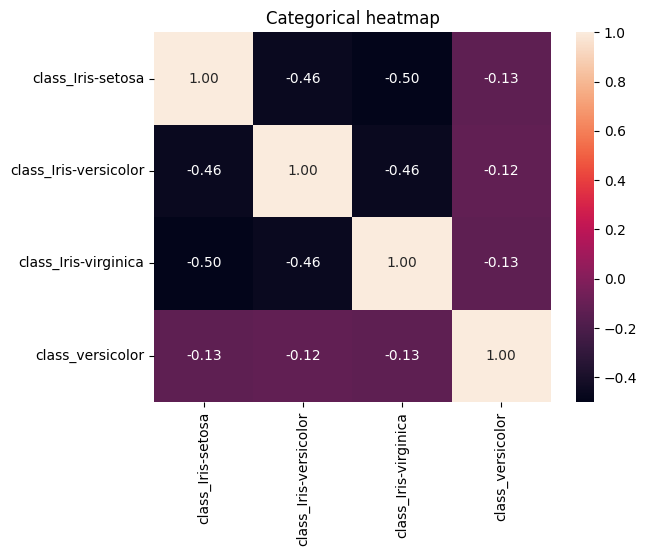

In [19]:
#Plot time!!

cat_heatmap= sns.heatmap(iris_onehot.corr(method='pearson'),annot=True, fmt='.2f')
plt.title('Categorical heatmap')
plt.show()

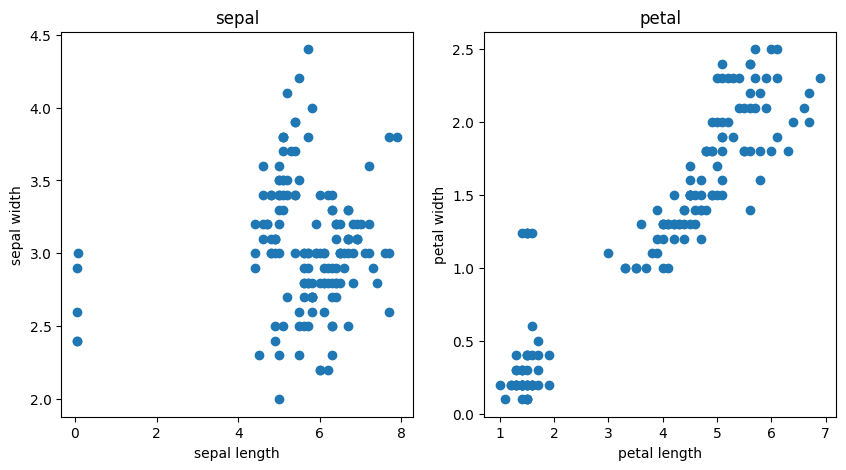

In [22]:
fig, ax= plt.subplots(ncols=2, nrows=1, figsize=(10,5))
ax[0].scatter(iris_imputer['sepal_length_cm'], iris_imputer['sepal_width_cm'])
ax[0].set(xlabel='sepal length', ylabel='sepal width', title= 'sepal')
ax[1].scatter(iris_imputer['petal_length_cm'], iris_imputer['petal_width_cm'])
ax[1].set(xlabel='petal length', ylabel='petal width', title='petal')
plt.show()

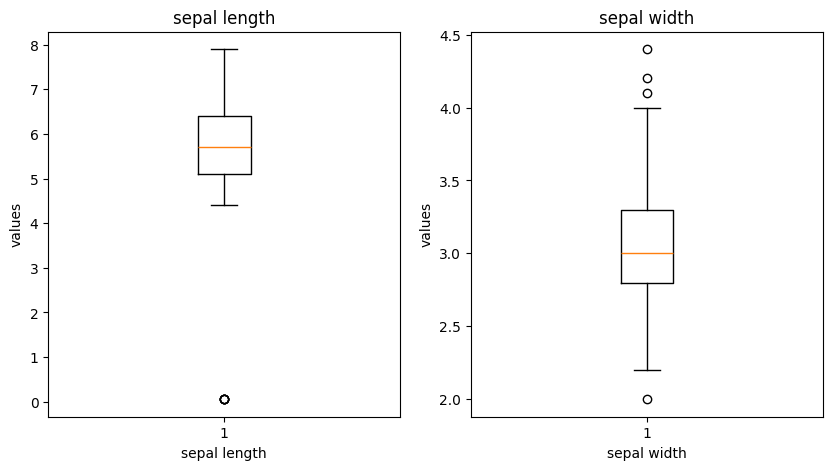

In [40]:
fig,ax= plt.subplots(ncols=2, nrows=1, figsize=(10,5))

ax[0].boxplot(iris_imputer['sepal_length_cm'])
ax[0].set(xlabel='sepal length', ylabel='values', title='sepal length')
ax[1].boxplot(iris_imputer['sepal_width_cm'])
ax[1].set(xlabel='sepal width', ylabel='values', title='sepal width')
plt.show()

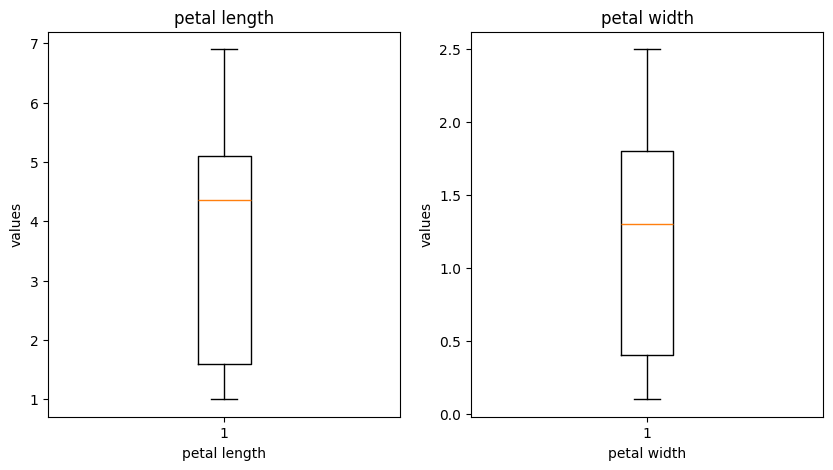

In [41]:
fig,ax= plt.subplots(ncols=2, nrows=1, figsize=(10,5))

ax[0].boxplot(iris_imputer['petal_length_cm'])
ax[0].set(xlabel='petal length', ylabel='values', title='petal length')
ax[1].boxplot(iris_imputer['petal_width_cm'])
ax[1].set(xlabel='petal width', ylabel='values', title='petal width')
plt.show()